# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

## Limiting behaviors of Black-Scholes formulas for European options

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

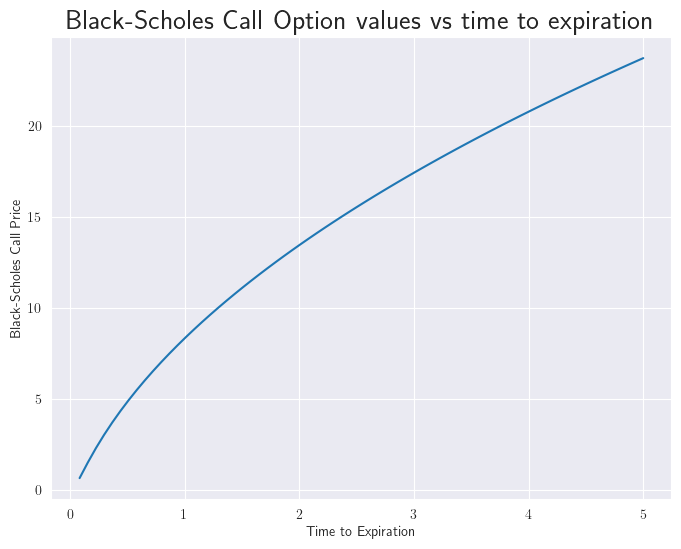

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['text.usetex'] = True

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i], r =0.005) for i in range(len(times))]


plt.figure(figsize = (8,6))
plt.title('Black-Scholes Call Option values vs time to expiration', size = 20)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

## Annotations begin here:

It looks like the call option becomes more valuable as time-to-expiration increases. This is known as the time value of money. From the graph, it looks like the call option price has a $\sqrt{T}$ behavior as $T\rightarrow 0$. Let us verify this by explicitly calculating the derivative

## Limiting behavior analysis for Black-Scholes call option value

### a. Short time to expiration $(T \rightarrow 0)$

We have, for the GBM,
$$ C(S_0, K, T) = S_0 \Phi(d_1) - Ke^{-rT}\Phi(d_2)$$
where $\Phi(x)$ is the cumulative distribution function of the normal distribution and $d_1, d_2$ are given as follows:
$$d_1 = \frac{\ln(S_0/K) + (r + \sigma^2/2)T}{\sigma\sqrt{T}}, \hspace{0.5in} d_2 = d_1 - \sigma\sqrt{T}$$

We can compute,
$$\Theta \equiv \frac{\partial C}{\partial T} = S_0\phi(d_1)\frac{\partial d_1}{\partial T} - Ke^{-rT}\left(\phi(d_2)\frac{\partial d_2}{\partial T}  - r\Phi(d_2) \right)$$
where $\phi(x) = \frac{d\Phi}{dx}$ is the pdf of the normal distribution. It is hard to see how this function behaves without assuming numerical values for the parameters. Let us adopt a different method and directly treat $C(S_0, K, T)$.

Let us make a natural assumption that as $T \rightarrow 0$, $K\rightarrow S_0$. In other words, we can use $K \propto S_0(1 + T)$ and thus $\ln(S_0/K) \sim -T$. This immediately implies that for small $T$,
$d_1 \sim \sqrt{T}$ and $d_2 \sim \sqrt{T}$ where we only keep track of the dependence on $T$ and ignore all other prefactors. For small $x$, the cdf $\Phi(x)$ can be approximated as a linear function,
$$\Phi(x) \approx \frac{1}{2} + \frac{x}{\sqrt{2\pi}}.$$

Finally, in the second term, we have the behavior
$$e^{-rT}\Phi(d_2) \sim (1-rT)\left(\frac{1}{2} + \frac{\sqrt{T}}{\sqrt{2\pi}}\right) \sim \frac{1}{2} + \frac{\sqrt{T}}{\sqrt{2\pi}}$$
Notice that the term proportional to $T$ and $T\sqrt{T}$ are subleading to $\sqrt{T}$ for small enough $T$.

Putting it all together, we see that for small $T$, the behavior of the Black-Scholes call option value is indeed $\sim \sqrt{T}$,
$$C(T) \approx_{T\rightarrow 0} \frac{S_0 - K}{2} + \kappa \sqrt{T}$$
where all undetermined parameters are absorbed in $\kappa$. 

### b. Long time to expiration, $(T \rightarrow \infty)$

This limit is much easier to analyze. Let $\epsilon \equiv 1/T$ be the small parameter. Notice that
$$ d_1 = \frac{\ln(S_0/K)}{\sigma}\sqrt{\epsilon} + \frac{r + \sigma^2/2}{\sigma}\epsilon^{-1/2}. $$
The second term is much larger than the first term for small $\epsilon$. One can ask, what if the strike price grows with $T$, thus making the coefficient of the first time larger? As $\ln{x}$ grows much slowly compared to any positive real power of $x$, it is safe to assume that the first term is still subleading. Thus, we arrive at the conclusion
$$d_1, d_2 \sim_{T\rightarrow \infty} \sqrt{T}$$

The cdf $\Phi(x)$ approaches 1 for large values of argument. Thus, we find that the call option value as per the Black-Scholes assumptions plateaus as the time to expiration for the options contract increases (upto logarithmic corrections). 

$$C(T) \approx_{T\rightarrow 0} S_0$$

The plateau effect can be seen in the following plot that include a ridiculously high range for time to expiration (upto 500 years):

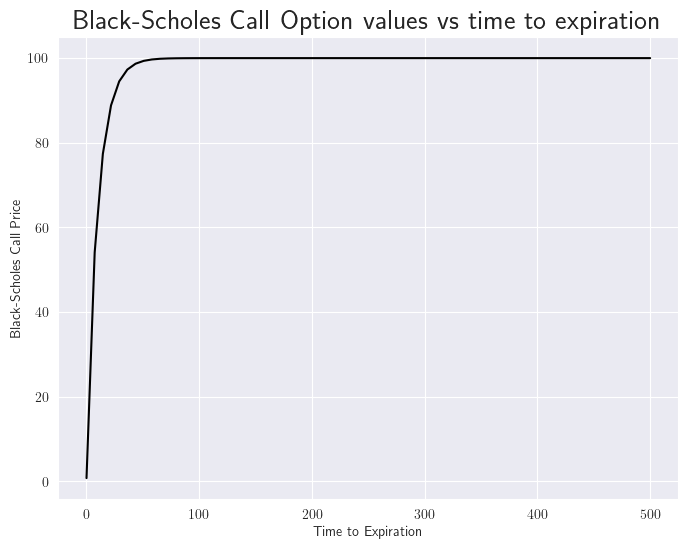

In [4]:
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 500, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i], r = 0.1) for i in range(len(times))]


plt.figure(figsize = (8,6))
plt.title('Black-Scholes Call Option values vs time to expiration', size = 20)
plt.plot(times, call_prices, color='black')
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

### To conclude, the price of a call-option under Black-Scholes assumptions is very sensitive to the time-to-expiration when the time-scales are short, and completely insensitive at long-enough timescales wherein it plateaus to the spot price. 

## Limiting behavior analysis for Black-Scholes put option value

Using the put-call parity equation (neglecting dividends), we have
$$P(S_0, K, T) = C(S_0, K, T) - S_0 + Ke^{-rT}$$

Thus, the limiting behavior in time $T$ for put options are exactly the same as the case of call options. It grows as $\sqrt{T}$ for small $T$ and plateaus to a constant for large $T$. In other words,
$$P(T) \approx_{T\rightarrow 0} \sqrt{T},$$
$$P(T) \approx_{T\rightarrow \infty} Ke^{-rT}.$$

It is interesting to note that put option plateau depends strongly on the risk-free interest rate being 0 or slightly positive. This means that, in the real world, the value of the put-option goes to 0 for longer and longer option contracts. The price increases for a few decades and then nosedives to 0.


For a 5% risk-free interest rate, using the parameters we have been using so far, the extremum happens at a time-to-expiration of 5 years. Thus, we conclude that this downturn should be taken into consideration if $r$ becomes high enough in the market. The real-world intuition is that if the risk-free interest rate is high, it is likely for equities to rise in price (thus devaluing money) rather than dropping in price. 

### In simpler words, it does not make sense to sell long put options contracts in a market where the risk-free interest rate is high.

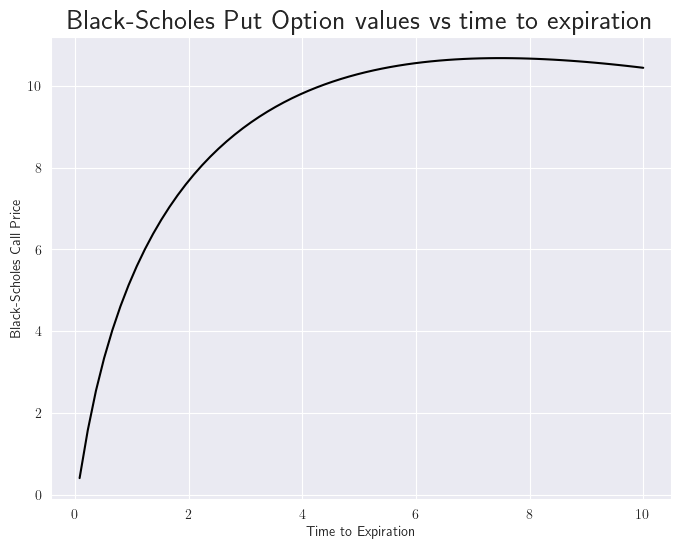

In [5]:
S0 = 100
K = 90
sigma = .3
times = np.linspace(1/12, 10, 70)


put_prices = [bs_put(S0,K,sigma, t = times[i], r = 0.05) for i in range(len(times))]


plt.figure(figsize = (8,6))
plt.title('Black-Scholes Put Option values vs time to expiration', size = 20)
plt.plot(times, put_prices, color='black')
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

## Spot-price sensitivity

To investigate the spot-price sensitivity, we investigate how the call option price varies with the ratio $S_0/K$ which is the more relevant quantity.

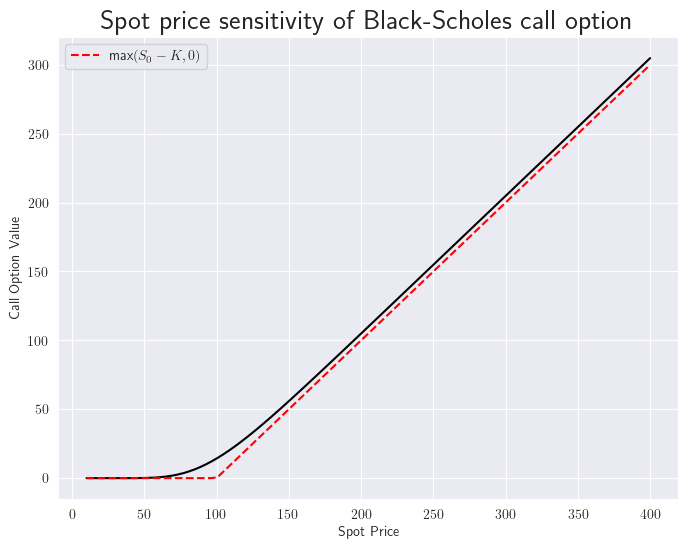

In [6]:
K = 100
S0_values = K*np.linspace(0.1,4,100)
sigma = .3
t = 1
r = 0.05

call_prices = [bs_call(S0 = S0_values[i],K = 100,sigma = 0.3, t = t, r = r) for i in range(len(S0_values))]

call_prices_log = np.log(call_prices)
call_prices_static = [np.maximum(S0_values[i]-K,0) for i in range(len(S0_values))]

plt.figure(figsize = (8,6))
plt.title('Spot price sensitivity of Black-Scholes call option ', size = 20)
plt.plot(S0_values, call_prices, color='black')
plt.plot(S0_values, call_prices_static, color='red', linestyle = 'dashed', label='max$(S_0 - K, 0)$')
plt.xlabel('Spot Price')
plt.ylabel('Call Option Value')
plt.legend()
plt.show()

Clearly, the value of the call option seems to be asymptotically approaching the static call option value (assuming $S = S_0$ for all $T$),  $S_0 - K$ with an offset. What is the offset? Let us do a simple limiting analysis again. 
<br/>
<br/>
Starting again from the Black-Scholes formula,
$$ C(S_0, K, T) = S_0 \Phi(d_1) - Ke^{-rT}\Phi(d_2)$$

we have that for large $S_0/K$, $d_1 \sim \ln(S_0/K)$ is a large number. The cdf $\Phi(d_1)$ really flattens out any changes when $d_1$ is large, in other words its derivative is almost zero. Thus, we have

$$\Phi(d_1), \Phi(d_2) \rightarrow 1, \ \  \text{as}\ \ S_0/K\rightarrow \infty $$ 

Assuming the risk-free interest rate $r$ is smaller than $1/T$, we get
$$ C(S_0, K, T) \approx_{S_0/K\rightarrow \infty} S_0 - K + KrT $$

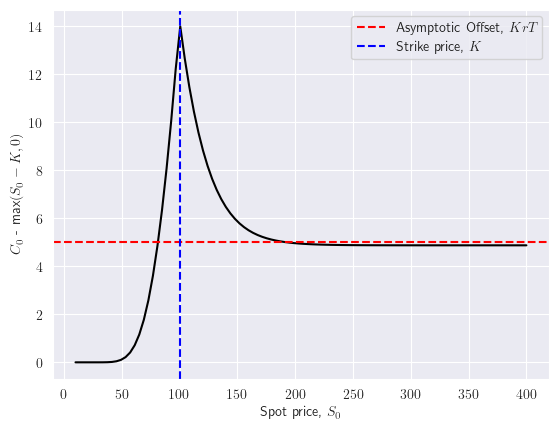

In [7]:
plt.plot(S0_values, np.array(call_prices) - np.array(call_prices_static), color='black')
plt.axhline(y = K*r*t, color='red', linestyle='dashed', label='Asymptotic Offset, $KrT$')
plt.axvline(x = 100, color='blue', linestyle = 'dashed', label='Strike price, $K$')
plt.ylabel("$C_0$ - max$(S_0 - K, 0)$")
plt.xlabel("Spot price, $S_0$")
plt.legend()
plt.show()

### Spot-Price sensitivity of put-option value

Intuition dictates that the put option value goes to zero as $S_0/K$ becomes larger and larger. It reflects the fact that a stock that is valued much higher than the strike price currently is unlikely to fall all the way to $K$, so for the seller the put option premium is basically a risk-free profit. We can see that easily from the put-call parity formula, using our earlier result for the call-option value's limiting behavior:

$$P(S_0, K, T) = C(S_0, K, T) - S_0 + Ke^{-rT} \approx_{S_0/K \rightarrow \infty} (S_0 - K + KrT) - S_0 + K(1 - rT) = 0$$

In fact, we need to analyse the spot-price sensitivity of put option values as $S_0/K$ goes to 0, which is the relevant limit in this case. We start from the Black-Scholes formula,
$$P(S_0, K, T) = -S_0\Phi(-d_1) + Ke^{-rT}\Phi(-d_2).$$

When $S_0/K \rightarrow 0$, $d_1, d_2 \sim \ln(S_0/K)$ are large negative numbers and consequently $(-d_1, -d_2)$ are large and positive. Again using the fact that $\Phi(x) \approx_{x \rightarrow \infty} 1$, we get

$$P(S_0, K, T) \approx_{S_0/K \rightarrow 0} K(1 - rT) + S_0.$$

Both of these limiting behaviors are reproduced in the plots below:

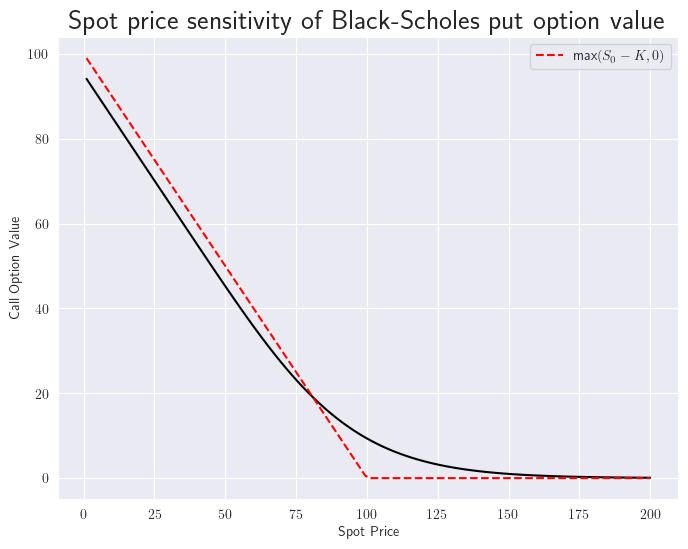

In [8]:
K = 100
S0_values = K*np.linspace(0.01,2,100)
sigma = .3
t = 1
r = 0.05

put_prices = [bs_put(S0 = S0_values[i],K = 100,sigma = 0.3, t = t, r = r) for i in range(len(S0_values))]

put_prices_log = np.log(put_prices)
put_prices_static = [np.maximum(K-S0_values[i],0) for i in range(len(S0_values))]

plt.figure(figsize = (8,6))
plt.title('Spot price sensitivity of Black-Scholes put option value ', size = 20)
plt.plot(S0_values, put_prices, color='black')
plt.plot(S0_values, put_prices_static, color='red', linestyle = 'dashed', label='max$(S_0 - K, 0)$')
plt.xlabel('Spot Price')
plt.ylabel('Call Option Value')
plt.legend()
plt.show()

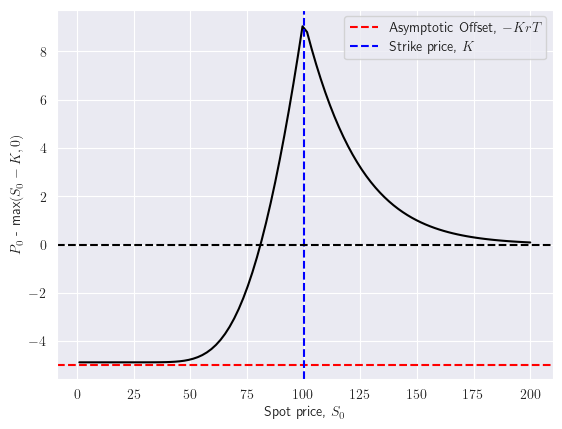

In [12]:
plt.plot(S0_values, np.array(put_prices) - np.array(put_prices_static), color='black')
plt.axhline(y = -K*r*t, color='red', linestyle='dashed', label='Asymptotic Offset, $-KrT$')
plt.axvline(x = 100, color='blue', linestyle = 'dashed', label='Strike price, $K$')
plt.axhline(y = 0, color='black', linestyle='dashed')
plt.ylabel("$P_0$ - max$(S_0 - K, 0)$")
plt.xlabel("Spot price, $S_0$")
plt.legend()
plt.show()